# Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
df = pd.read_csv('../resource/Titanic2.txt', encoding='ISO 8859-15', quotechar='"', sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  950 non-null    int64  
 1   Survived     947 non-null    float64
 2   Pclass       950 non-null    object 
 3   Name         950 non-null    object 
 4   Sex          949 non-null    object 
 5   Age          765 non-null    float64
 6   SibSp        950 non-null    int64  
 7   ParCh        950 non-null    int64  
 8   Ticket       950 non-null    object 
 9   Fare         948 non-null    float64
 10  Cabin        219 non-null    object 
 11  Embarked     946 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 89.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration and Preparation

Learn about data
1. Are there missing data?
2. Is it categorical? if not, min , max, avg values? if yes, what are the categories?
3. distribution of variables
4. Duplicate entry

### This will helps us to give tha idea about missing data 

In [9]:
miss_df = df.isnull().sum(axis = 0).reset_index()
miss_df.columns = ['column_name', 'miss_count']
miss_df['fill_factor'] = (df.shape[0] - miss_df['miss_count']) / df.shape[0] * 100
miss_df = miss_df.sort_values('fill_factor').reset_index(drop = True)
miss_df

,column_name,miss_count,fill_factor
0,Cabin,731,23.052632
1,Age,185,80.526316
2,Embarked,4,99.578947
3,Survived,3,99.684211
4,Fare,2,99.789474
5,Sex,1,99.894737
6,PassengerId,0,100.000000
7,Pclass,0,100.000000
8,Name,0,100.000000
9,SibSp,0,100.000000


### Handling Missing data

Strategies
<li> Drop any observation with missing age
<li> Set NaN as 0 - in the case  continous / categorical variables, create some new category for Nan?
<li> use average value..
<li> create Ml algo to predict missing values(ex-linear regression)

In [12]:
df['Age']  = df['Age'].interpolate()
df.Age.isnull().sum()

0

In [55]:
### categorical variable

In [13]:
df = df.drop([918, 920])

In [14]:
df.Survived.value_counts()

0.0    584
1.0    361
Name: Survived, dtype: int64

In [15]:
df['Survived'].mean()

0.382010582010582

In [16]:
df.Sex.value_counts()

male      612
female    336
Name: Sex, dtype: int64

In [17]:
df.Pclass.value_counts()

3    521
1    232
2    195
Name: Pclass, dtype: int64

### Data Representation and Transformation

In [18]:
df[df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.00,0,0,LINE,0.0,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.00,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.00,0,0,LINE,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,26.00,0,0,239853,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.00,0,0,LINE,0.0,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,38.50,0,0,239853,0.0,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,47.00,0,0,239853,0.0,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.50,0,0,239854,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.00,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,20.50,0,0,112052,0.0,NaN,S


### Droping some of the columns which many not contribute much to our machine learning model such as Name, Ticket, Cabin etc

In [19]:
df['Pclass'] = df['Pclass'].astype(str).astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  948 non-null    int64  
 1   Survived     945 non-null    float64
 2   Pclass       948 non-null    int64  
 3   Name         948 non-null    object 
 4   Sex          948 non-null    object 
 5   Age          948 non-null    float64
 6   SibSp        948 non-null    int64  
 7   ParCh        948 non-null    int64  
 8   Ticket       948 non-null    object 
 9   Fare         948 non-null    float64
 10  Cabin        217 non-null    object 
 11  Embarked     946 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 96.3+ KB


In [21]:
cols = ['Name', 'Ticket', 'Cabin', 'PassengerId']
df_DT = df
df_DT = df_DT.drop(cols,axis=1)
df_DT.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


### Now we convert the Pclass, Sex, Embarked to columns in pandas and drop them after conversion.

In [22]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df_DT[col]))

In [23]:
df_dummies = pd.concat(dummies, axis = 1)
df_dummies.head()

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


### Then  we concatenate to the original dataframe columnwise

In [24]:
df_DT = pd.concat((df_DT, df_dummies), axis = 1)

In [25]:
df_DT.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh,Fare,Embarked,1,2,3,female,male,C,Q,S
0,0.0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1.0,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1.0,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1.0,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0.0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


### Now that we converted Pclass, Sex, Embarked values into columns, we drop the redundant same columns from the dataframe

In [26]:
df_DT = df_DT.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)
df_DT.head()

,Survived,Age,SibSp,ParCh,Fare,1,2,3,female,male,C,Q,S
0,0.0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1.0,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1.0,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [27]:
df_DT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  945 non-null    float64
 1   Age       948 non-null    float64
 2   SibSp     948 non-null    int64  
 3   ParCh     948 non-null    int64  
 4   Fare      948 non-null    float64
 5   1         948 non-null    uint8  
 6   2         948 non-null    uint8  
 7   3         948 non-null    uint8  
 8   female    948 non-null    uint8  
 9   male      948 non-null    uint8  
 10  C         948 non-null    uint8  
 11  Q         948 non-null    uint8  
 12  S         948 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 51.8 KB


### All is good, except Survived which has few missing values. Pandas has a nice interpolate() function that will replace all the missing NaNs to interpolated values.

In [28]:
df_DT['Survived'] = df_DT['Survived'].interpolate()

In [29]:
df_DT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 949
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  948 non-null    float64
 1   Age       948 non-null    float64
 2   SibSp     948 non-null    int64  
 3   ParCh     948 non-null    int64  
 4   Fare      948 non-null    float64
 5   1         948 non-null    uint8  
 6   2         948 non-null    uint8  
 7   3         948 non-null    uint8  
 8   female    948 non-null    uint8  
 9   male      948 non-null    uint8  
 10  C         948 non-null    uint8  
 11  Q         948 non-null    uint8  
 12  S         948 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 51.8 KB


### Now we convert our dataframe from pandas to numpy and we assign input and output

In [30]:
label = df_DT['Survived'].values

In [31]:
df_DT.head()

,Survived,Age,SibSp,ParCh,Fare,1,2,3,female,male,C,Q,S
0,0.0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1.0,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1.0,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### X has still Survived values in it, which should not be there. So we drop in numpy column which is the 1st column

In [32]:
df_ml = df_DT.drop(['Survived'], 1)
feature = df_ml.values
df_ml.head()

,Age,SibSp,ParCh,Fare,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### Now that we are ready with X and y, lets split the dataset for 70% Training and  30% test set using train_test split

In [35]:
train_x, test_x, train_y, test_y = train_test_split(feature, label, test_size = 0.3, random_state=0)

### Lets start with simple Decision Tree Classifier machine learning algorithm and see how it goes

In [36]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.8105263157894737

### Decision trees compute entropy in the information system. If you peform a decision tree on dataset, the variable importances_ contains important information on what columns of data has large variances thus contributing to the decision. Lets see the output

### This output shows that second element in array 0.09,  “Age” has 9% importance, 'SibSp' has 6.8%, 'fare' has 5.4%, the last 4th shows 56.3% which is for  ‘Females’.

In [37]:
imp = clf.feature_importances_
names = df_ml.columns
imp, names = zip(*(zip(imp, names)))
print(imp, names)

(0.09019173856770002, 0.06835898161995453, 0.02689369562999676, 0.06055069215496644, 0.053475663663459676, 0.0, 0.12030151164726244, 0.0, 0.5630381290826999, 0.0, 0.0, 0.017189587633960255) ('Age', 'SibSp', 'ParCh', 'Fare', 1, 2, 3, 'female', 'male', 'C', 'Q', 'S')


### Data Visualization and Presentation

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

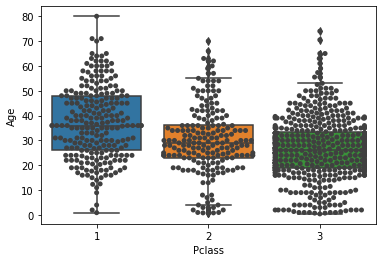

In [38]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
sns.swarmplot(x = 'Pclass', y = 'Age', data = df, color = '.25')

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

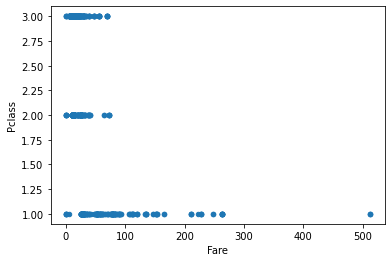

In [39]:
df.plot.scatter(x = 'Fare', y = 'Pclass')

<AxesSubplot:title={'center':'female Survivors'}>

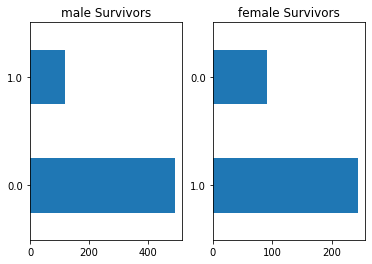

In [40]:
# Womens and mens surviving ratio
fig, axs = plt.subplots(1, 2)
df[df.Sex == 'male'].Survived.value_counts().plot(kind='barh', ax=axs[0], title='male Survivors')
df[df.Sex == 'female'].Survived.value_counts().plot(kind='barh', ax = axs[1], title = 'female Survivors')

<AxesSubplot:title={'center':'Female child Survivors'}>

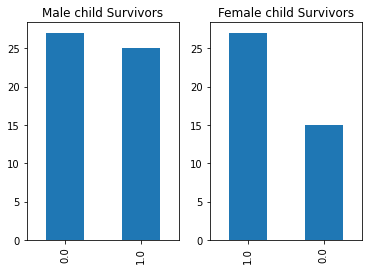

In [41]:
# Male and female survival by their age
fig, axs = plt.subplots(1,2)
df[(df.Sex == 'male') & (df.Age < 15)].Survived.value_counts().plot(kind = 'bar', ax = axs[0], title = 'Male child Survivors')
df[(df.Sex == 'female') & (df.Age < 15)].Survived.value_counts().plot(kind = 'bar', ax = axs[1], title = 'Female child Survivors')

In [42]:
df[['Pclass', 'Survived', 'Sex']].groupby(['Pclass', 'Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Sex,Survived
0,1,female,0.940000
2,2,female,0.898734
4,3,female,0.503226
1,1,male,0.369231
3,2,male,0.155172
5,3,male,0.142466


In [43]:
df['Survived'].mean()

0.382010582010582

In [44]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.727545
1,male,0.193126


In [48]:
print(df[(df.Sex == 'male') & (df.Age < 10)].Survived.mean(), df[(df.Sex == 'female') & (df.Age < 10)].Survived.mean())

0.5384615384615384 0.6451612903225806


In [50]:
print(df[(df.Sex == 'male') & (df.Age < 2)].Survived.mean(), df[(df.Sex == 'female') & (df.Age < 2)].Survived.mean())

0.6923076923076923 1.0


array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>]], dtype=object)

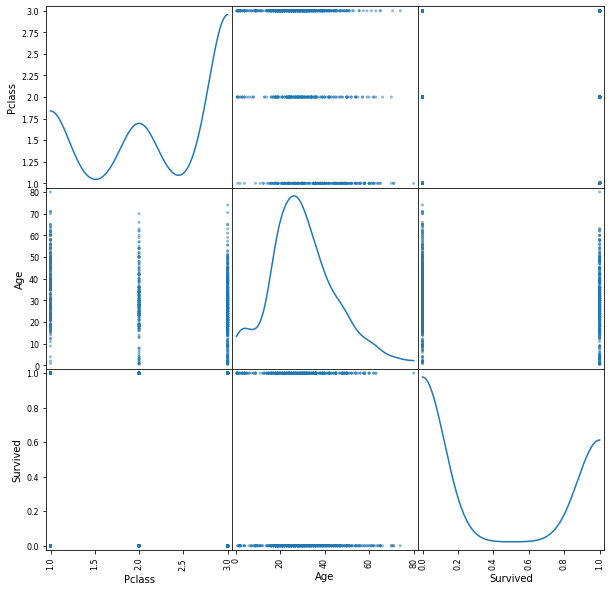

In [52]:
cols = ['Pclass', 'Age', 'Survived']
pd.plotting.scatter_matrix(df[cols], figsize = (10,10), diagonal = 'kde')

In [53]:
df_age = df
for dataset in df:
    df_age['FamilySize'] = df['SibSp'] + df['ParCh'] + 1
print(df_age[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean())

   FamilySize  Survived
0           1  0.301954
1           2  0.544944
2           3  0.579439
3           4  0.687500
4           5  0.187500
5           6  0.125000
6           7  0.333333
7           8  0.000000
8          11  0.000000
